In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import math

In [3]:
train_part = pd.read_csv('train_part.csv')

In [4]:
label_type=list(zip(list(train_part.columns),map(str,list(train_part.dtypes))))

In [29]:
#for column in train_part.columns:
#    print(column)

In [47]:
#for pair in range(len(label_type)):
#    print(pair[1])

In [5]:
for pair in label_type:
    if pair[1]=='int64':
        train_part[pair[0]]=train_part[pair[0]].astype(np.int32)
    elif pair[1]=='float64':
        train_part[pair[0]]=train_part[pair[0]].astype(np.float32)

In [6]:
train_part_target = train_part['trip_duration']

In [7]:
columns_full=list(train_part.columns)

In [8]:
features_labels = [
 'vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'Manhattan distance (miles)',
 'pickup_hour_min',
 'pickup_hour',
 'pickup_month',
 'pickup_day',
 'pickup_weekday',
 'pickup_area_0',
 'dropoff_area_0',
 'pickup_area_1',
 'dropoff_area_1',
 'pickup_area_2',
 'dropoff_area_2',
 'pickup_area_3',
 'dropoff_area_3',
 'pickup_area_4',
 'dropoff_area_4',
 'pickup_area_5',
 'dropoff_area_5',
 'pickup_area_6',
 'dropoff_area_6',
 'pickup_area_7',
 'dropoff_area_7',
 'pickup_area_8',
 'dropoff_area_8',
 'pickup_area_9',
 'dropoff_area_9',
 'pickup_area_10',
 'dropoff_area_10',
 'pickup_area_11',
 'dropoff_area_11',
 'pickup_area_12',
 'dropoff_area_12',
 'pickup_area_13',
 'dropoff_area_13',
 'pickup_area_14',
 'dropoff_area_14']

In [9]:
target_label = ['trip_duration']

In [10]:
train_part_features_target = train_part[features_labels+target_label]

In [23]:
#train_part_features_target

In [62]:
#train_part_features_target = pd.concat([train_part_features, train_part_target], axis=1)

In [11]:
train_part_features_target=train_part_features_target[train_part_features_target['passenger_count']!=0]

In [26]:
#train_part_features_target

In [12]:
train_part_features_target_10000smaller=train_part_features_target[train_part_features_target[target_label[0]]<10000]

In [13]:
train_part_features_target_10000larger=train_part_features_target[(train_part_features_target[target_label[0]]>=60000)&(train_part_features_target[target_label[0]]<90000)]

In [21]:
#train_part_features_target_10000smaller

In [64]:
del train_part_features
del train_part_target

In [56]:
del train_part

In [58]:
#train_part_features

___
### 1 Machine learning models
___

#### 1.1 Random Forest Regression

In [14]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [15]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [16]:
train_part_features_target_100000=train_part_features_target_10000smaller.sample(n=100000)

In [79]:
#train_part_features_target = train_part_features_target_100000[]

In [17]:
rfr_duration = RFR()

In [18]:
predicted=cross_val_predict(rfr_duration,train_part_features_target_100000[features_labels],train_part_features_target_100000[target_label[0]],cv=5)

In [19]:
predicted_10000larger=cross_val_predict(rfr_duration,train_part_features_target_10000larger[features_labels],train_part_features_target_10000larger[target_label[0]],cv=5)

In [20]:
from sklearn import metrics

In [21]:
MSE_10000smaller=metrics.mean_squared_error(predicted,train_part_features_target_100000[target_label])

In [22]:
RMSE_10000smaller=math.sqrt(MSE_10000smaller)

In [23]:
print(MSE_10000smaller,RMSE_10000smaller)

109305.424983 330.6137096115344


(0, 90000)

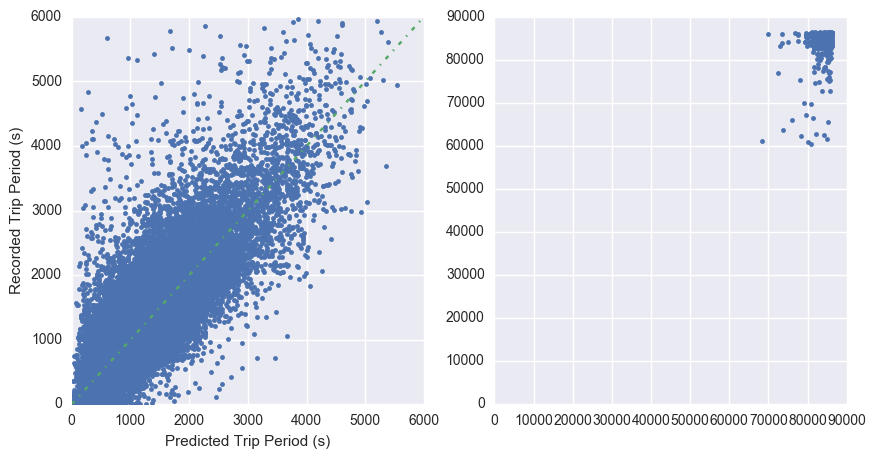

In [24]:
_, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(predicted,train_part_features_target_100000[target_label],'.')
axes[0].set_xlim(0,6000)
axes[0].set_ylim(0,6000)
axes[0].plot([0,10000],[0,10000],'-.')
axes[0].set_xlabel('Predicted Trip Period (s)')
axes[0].set_ylabel('Recorded Trip Period (s)')
axes[1].plot(predicted_10000larger,train_part_features_target_10000larger[target_label],'.')
axes[1].set_xlim(0,90000)
axes[1].set_ylim(0,90000)
#axes[1].plot([0,10000],[0,10000],'-.')

___
#### 1.2 SVR
___

In [25]:
from sklearn import svm

In [66]:
from sklearn.model_selection import GridSearchCV

In [96]:
svr_duration = svm.SVR(kernel='rbf',C=10000,gamma=0.001)

In [67]:
svr_duration_cv=svm.SVR()

In [89]:
param_grid={'C': [2000,5000,10000], 'gamma': [0.01,0.001,0.0001]}

In [90]:
cv_svr = GridSearchCV(svr_duration_cv, param_grid)

In [102]:
train_part_features_target_10000=train_part_features_target_10000smaller.sample(n=10000)

In [103]:
train_part_features_target_10000.to_csv('partial_train_10000.csv')

In [94]:
cv_svr.fit(train_part_features_target_10000[features_labels],train_part_features_target_10000[target_label[0]])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.01, 0.001, 0.0001], 'C': [2000, 5000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [95]:
cv_svr.best_params_

{'C': 10000, 'gamma': 0.001}

In [97]:
predicted_svr=cross_val_predict(svr_duration,train_part_features_target_20000[features_labels],train_part_features_target_20000[target_label[0]],cv=5)

In [31]:
#!pwd

In [98]:
MSE_svr_10000smaller=metrics.mean_squared_error(predicted_svr,train_part_features_target_20000[target_label])

In [99]:
RMSE_svr_10000smaller = math.sqrt(MSE_svr_10000smaller)

In [100]:
RMSE_svr_10000smaller

356.9072203071416

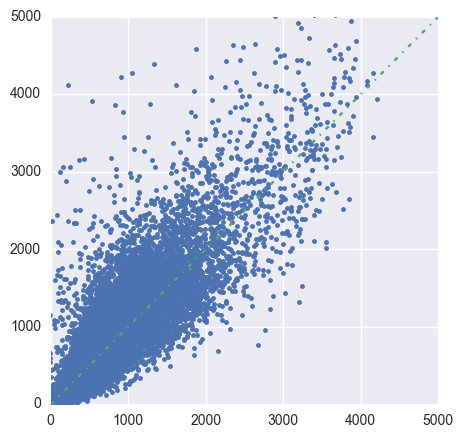

In [101]:
_,ax_svr = plt.subplots(1,1,figsize=(5,5))
ax_svr.plot(predicted_svr,train_part_features_target_20000[target_label],'.')
ax_svr.set_xlim(0,5000)
ax_svr.set_ylim(0,5000)
ax_svr.plot([0,5000],[0,5000],'-.')